In [10]:
import pandas as pd
tdf_all = pd.read_csv('../data/edgelists/tdf_all_specialties.csv')
tdf_all = tdf_all.dropna()
tdf_all

,node_u,node_v,timestamp,doctor_id,transition,specialty,weight
0,National Capital Consortium,National Capital Consortium,1972.0,3721.0,residency-residency,neurosurgery,0.000061
1,National Capital Consortium,National Capital Consortium,1968.0,3721.0,internship-residency,neurosurgery,0.000061
2,Albany Medical College,National Capital Consortium,1967.0,3721.0,md-internship,neurosurgery,0.000061
3,University of Texas Health Science Center San ...,University of Washington,2003.0,2833.0,residency-residency,neurosurgery,0.000061
4,University of Texas Health Science Center San ...,University of Texas Health Science Center San ...,1999.0,2833.0,internship-residency,neurosurgery,0.000061
...,...,...,...,...,...,...,...
560431,McGaw Medical Center of Northwestern University,McGaw Medical Center of Northwestern University,2000.0,182.0,residency-fellowship,hematology,0.000203
560432,Rush Medical College of Rush University Medica...,McGaw Medical Center of Northwestern University,1997.0,182.0,md-residency,hematology,0.000203
560433,Westchester Medical Center,Stanford University,2018.0,478.0,fellowship-fellowship,hematology,0.000203
560434,Westchester Medical Center,Westchester Medical Center,2015.0,478.0,residency-fellowship,hematology,0.000203


In [11]:
unique_institutions = pd.concat([tdf_all['node_v'], tdf_all['node_u']]).unique()
len(unique_institutions)

12415

In [12]:
unique_inst_stripped = []  
for s in unique_institutions:
    unique_inst_stripped.append(s.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " "))
unique_inst_stripped = list(set(unique_inst_stripped))
len(unique_inst_stripped)

11174

In [769]:
b_inst = [i for i in unique_inst_stripped if i.startswith('y')]
len(b_inst)

57

In [17]:
b_institutions = []
for i in unique_inst_stripped:
    b_institutions.append(i.replace('  ', ' ').replace('  ', ' '))


In [18]:
b_institutions = list(set(b_institutions))
b_institutions.sort()
len(b_institutions)

11041

In [772]:
b_institutions

['yakima valley farm workers clinic sollus northwest',
 'yale',
 'yale and case western reserve',
 'yale child study center anna freud centre',
 'yale college',
 'yale college ‘59',
 'yale graduate school',
 'yale griffin hospital',
 'yale law school',
 'yale new haven',
 'yale new haven hospital',
 'yale new haven hospital saint raphael campus',
 'yale new haven medical center',
 'yale new haven medical center primary care',
 'yale new haven medical center st raphael',
 'yale new haven medical center waterbury',
 'yale school of law',
 'yale school of management',
 'yale school of medicine',
 'yale school of medicine veterans health administration',
 'yale school of medicine yale new haven hospital',
 'yale school of public health',
 'yale school of public heatlh',
 'yale st raphael',
 'yale university',
 'yale university connecticut',
 'yale university divinity school',
 'yale university graduate school',
 'yale university medical school new haven',
 'yale university school of manage

In [ ]:
import json
with open('../data/master_map_2.json','r') as f:
    master_map = json.load(f)

# with open('../data/master_map_2.json','w') as f:
#     json.dump(master_map, f)

In [46]:
b_list = []
for u,v in master_map.items():
    b_list.append(u)
    for item in v:
        b_list.append(item)

In [41]:
len(not_in_b_list)

537

In [47]:
not_in_b_list = []
for i in b_institutions:
    if i not in b_list:
        not_in_b_list.append(i)
not_in_b_list

[]

In [44]:
from tqdm import tqdm
from rapidfuzz import fuzz

matches = 0
non_matches = 0
all_keys = list(master_map.keys())
threshold = 75

for i in tqdm(not_in_b_list):
    best_match = None
    best_score = 0
    for key in all_keys:
        avg_ratio = sum(fuzz.ratio(i, val) for val in master_map[key]) / len(master_map[key])
        if avg_ratio > best_score:
            best_score = avg_ratio
            best_match = key
    if best_score > threshold:
        master_map[best_match].append(i)
        print(master_map[best_match], i)
        matches += 1
    else:
        master_map[i] = [i]
        non_matches += 1

  6%|▌         | 30/510 [00:00<00:04, 103.46it/s]

['american university hospital beirut lebanon', 'american university of beirut lebanon'] american university of beirut lebanon
['andhra medical college ntr', 'andhra medical college visakhapatnam'] andhra medical college visakhapatnam
['ann & robert h lurie childrens hospital', 'ann & robert h lurie childrens hospital of chicago', 'ann and robert h lurie childrens hospital of chicago'] ann and robert h lurie childrens hospital of chicago
['santosh university', 'antioch university west'] antioch university west
['tabriz university of medical sciences', 'babol university of medical sciences'] babol university of medical sciences
['ben gurion university', 'ben gurion university israel', 'ben gurion university of the negev', 'ben gurion univesity of the negev'] ben gurion univesity of the negev
['international medical university', 'bogomolets national medical university'] bogomolets national medical university
['hokkaido university faculty of medicine', 'cairo university faculty of medicin

 12%|█▏        | 60/510 [00:00<00:03, 129.18it/s]

['all childrens hospital st petersburg', 'childrens hospital of pittsburgh'] childrens hospital of pittsburgh
['coe college', 'chowgule college'] chowgule college
['university of ioannina faculty of medicine', 'christian university of indonesia faculty of medicine'] christian university of indonesia faculty of medicine
['cincinnati childrens', 'cincinnati childrens hospital', 'cincinnati childrens hospital medical center', 'cincinnati childrens hospital medical center university of cincinnati', 'cincinnati childrens hosp mc'] cincinnati childrens hosp mc
['bangladesh college of physicians and surgeons', 'columbia univ college of physiciansand surgeons'] columbia univ college of physiciansand surgeons
['rockford university', 'concord university'] concord university
['crespo medical center', 'cook childrens medical center'] cook childrens medical center
['kings county hospital', 'cook county hospital'] cook county hospital
['csu', 'cu'] cu
['ajou university school of medicine', 'damascus

 17%|█▋        | 89/510 [00:00<00:03, 133.79it/s]

['toledo university college of law', 'depaul university college of law'] depaul university college of law
['earl k long medical center', 'earl k long medical center baton rouge la'] earl k long medical center baton rouge la
['dallas baptist university', 'east texas baptist university'] east texas baptist university
['western illinois university', 'eastern illinois university'] eastern illinois university
['vanderbilt university college of arts & science', 'vanderbilt university college of arts and science', 'vanderbilt university college of arts and sciences', 'ebonyi state university college of health sciences'] ebonyi state university college of health sciences
['edward via college of osteopathic medicine auburn campus', 'edward via college of osteopathic medicine carolinas campus', 'edward via virginia college of osteopathic medicine', 'edward via virginia college of osteopathic medicine blacksburg va', 'edward via virginia college of osteopathic medicine louisiana campus', 'edward 

 23%|██▎       | 118/510 [00:00<00:02, 131.68it/s]

['vanderbilt university college of arts & science', 'vanderbilt university college of arts and science', 'vanderbilt university college of arts and sciences', 'ebonyi state university college of health sciences', 'georgetown university college of arts & sciences'] georgetown university college of arts & sciences
['government medical college srinagar', 'government medical college jammu'] government medical college jammu
['reed college', 'graceland college'] graceland college
['graduate school of public health university of california berkeley', 'graduate school of public health university of puerto rico'] graduate school of public health university of puerto rico
['alexandria university childrens hospital', 'hacettepe university childrens hospital'] hacettepe university childrens hospital
['antioch college', 'hartwick college'] hartwick college
['nemours childrens hospital', 'helen devos childrens hospital'] helen devos childrens hospital
['heller school brandeis university', 'heller sc

 29%|██▉       | 149/510 [00:01<00:02, 140.49it/s]

['hickory high school', 'irmo high school'] irmo high school
['quality scholar james m anderson center for health systems excellence', 'james m anderson center for health systems excellence'] james m anderson center for health systems excellence
['jawaharlal nehru medical college', 'jawaharlal nehru medical college aligarh', 'jawaharlal nehru medical college aligarh muslim university', 'jawaharlal nehru medical college amu', 'jawaharlal nehru medical college amu aligarh', 'jawaharlal nehru medical college belgavi karnataka', 'jawaharlal nehru medical college allahbad'] jawaharlal nehru medical college allahbad
['jesus college university of cambridge', 'jesus college university of oxford'] jesus college university of oxford
['kansas city university', 'kansas university'] kansas university
['alfred university', 'karlsruhe university'] karlsruhe university
['karolinska hospital', 'karolinska institute', 'karolinska institute faculty of medicine', 'karolinska institutet'] karolinska instit

 35%|███▌      | 179/510 [00:01<00:02, 143.78it/s]

['fuller theological seminary', 'lutheran theological seminary'] lutheran theological seminary
['kenyon college', 'lyon college'] lyon college
['macaulay honors college at brooklyn college ba md program', 'macaulay honors college at brooklyn college'] macaulay honors college at brooklyn college
['the maclean center for clinical medical ethics', 'maclean center for clinical medical ethics'] maclean center for clinical medical ethics
['new york city department of health and mental hygiene', 'maryland state department of health and mental hygiene'] maryland state department of health and mental hygiene
['rochester institute of technology', 'massachussetts institute of technology'] massachussetts institute of technology
['bates college', 'masters college'] masters college
['montreal childrens hospital', 'mattel childrens hospital'] mattel childrens hospital
['montreal childrens hospital', 'mattel childrens hospital', 'mattel childrens hospital at ucla'] mattel childrens hospital at ucla
['

 41%|████      | 210/510 [00:01<00:02, 144.00it/s]

['chung ang university college of medicine', 'michigan state university colege of human medicine'] michigan state university colege of human medicine
['middlesex hospital', 'middle georgia hospital'] middle georgia hospital
['milken institute of public health at george washington university', 'milken institute school of public health george washington university'] milken institute school of public health george washington university
['jilin university', 'millikin university'] millikin university
['shifa college of medicine', 'morsani college of medicine usf'] morsani college of medicine usf
['kosair childrens hospital', 'mount sinai kravis childrens hospital'] mount sinai kravis childrens hospital
['mount st marys university', 'mt st marys university'] mt st marys university
['york university', 'n\\ew york university nyu'] n\ew york university nyu
['national health service nhs', 'national health service corps'] national health service corps
['national institute of aging', 'national ins

 47%|████▋     | 240/510 [00:01<00:01, 141.61it/s]

['national institute of allergy & infectious diseases', 'national institute of allergy and infectious disease', 'nih national institutes allergy and infectious diseases'] nih national institutes allergy and infectious diseases
['central college', 'north central college'] north central college
['georgia college & state university', 'georgia college and state university', 'north georgia college & state university'] north georgia college & state university
['south shore hospital', 'north shore child hospital'] north shore child hospital
['ann & robert h lurie childrens hospital', 'ann & robert h lurie childrens hospital of chicago', 'ann and robert h lurie childrens hospital of chicago', 'northwestern university ann & robert h lurie childrens hospital of chicago'] northwestern university ann & robert h lurie childrens hospital of chicago
['northeastern university', 'northwestern universitys'] northwestern universitys
['garnet health medical center', 'novant health forsyth medical center']

 56%|█████▌    | 285/510 [00:02<00:01, 145.01it/s]

['lewis university', 'philipps university'] philipps university
['spartan health sciences university', 'ponce health science university'] ponce health science university
['oakton community college', 'portland community college'] portland community college
['himalayan institute of medical sciences', 'prathima institute of medical sciences'] prathima institute of medical sciences
['widener university', 'rider university'] rider university
['st christophers hospital for children', 'riley hospital for children'] riley hospital for children
['ut houston school of public health', 'robert wood johnson school of public health'] robert wood johnson school of public health
['manchester university', 'rochester university'] rochester university
['rollins school of public health', 'rollins school of public health emory university', 'rollins school of public health emory'] rollins school of public health emory
['university of tokyo graduate school of medicine', 'rowan university graduate school of b

 62%|██████▏   | 315/510 [00:02<00:01, 140.66it/s]

['gb pant hospital university of delhi', 'safdurjung hospital university of delhi'] safdurjung hospital university of delhi
['saint michaels college', 'saint pauls college'] saint pauls college
['st peters college', 'saint peters college'] saint peters college
['st vincents college', 'saint vincent college'] saint vincent college
['asbury university', 'salisbury university'] salisbury university
['cranston general hospital', 'san francisco general hospital'] san francisco general hospital
['uw school of public health', 'school of public health ut health'] school of public health ut health
['t n medical college university of bombay', 'seth g s medical college university of bombay'] seth g s medical college university of bombay
['john marshall law school', 'seton hall law school'] seton hall law school
['southeast university medical college', 'shantou university medical college'] shantou university medical college
['sheba medical center', 'sheba tel hashomer mesical center', 'sheba tel h

 68%|██████▊   | 345/510 [00:02<00:01, 140.39it/s]

['saba university school of medicine', 'stanford univesity school of medicine'] stanford univesity school of medicine
['state university of new york at albany', 'stat university of new york at downstate brooklyn ny'] stat university of new york at downstate brooklyn ny
['state university of iowa', 'state university at albany'] state university at albany
['state university of new york at downstate', 'state university of new york downstate medical center college of medicine', 'state university of new york downstate medical center morse institute of molecular genetics', 'state university of new york at downstate medical center graduate school'] state university of new york at downstate medical center graduate school
['state university of new york harpur college', 'state university of new york at orange county community college'] state university of new york at orange county community college
['state university of new york at albany', 'stat university of new york at downstate brooklyn ny',

 73%|███████▎  | 374/510 [00:02<00:00, 138.68it/s]

['the hospital for sick children', 'the hospital for sick children in toronto on canada', 'the hospital for sick children university of toronto', 'the hospital for sick children sickkids'] the hospital for sick children sickkids
['ut houston school of public health', 'robert wood johnson school of public health', 'the johns hopkins school of public health'] the johns hopkins school of public health
['medical city dallas', 'medical city', 'the medical city'] the medical city
['reach institute', 'the reach institute'] the reach institute
['university of delaware', 'the university of delaware'] the university of delaware
['the university of virginia', 'the university of illinois'] the university of illinois
['university of note dame', 'university of notre dame', 'university of notre dame du lac!', 'univ of notre dame', 'university od notre dame', 'the university of notre dame'] the university of notre dame
['the university of alabama', 'the university of oklahoma'] the university of oklah

 82%|████████▏ | 419/510 [00:03<00:00, 143.30it/s]

['university of bordeaux', 'univeristy of bordeaux france'] univeristy of bordeaux france
['universidad central del caribe', 'universidad central del caribe school of medicine', 'universidad central el caribe'] universidad central el caribe
['universidad de la laguna', 'universidad la laguna', 'universidad de la habana'] universidad de la habana
['universidad iberoamericana unibe', 'universidad iberoamericana'] universidad iberoamericana
['universidad iberoamericana unibe', 'universidad iberoamericana', 'universidad interamericana'] universidad interamericana
['universidad nacional de cordoba', 'universidad internacional del ecuador'] universidad internacional del ecuador
['universidad libre de colombia', 'universidad libre cali'] universidad libre cali
['universidad nacional de cordoba', 'universidad internacional del ecuador', 'universidad nacional de colombia'] universidad nacional de colombia
['university daix marseille', 'universite aix marseille'] universite aix marseille
['unive

 88%|████████▊ | 449/510 [00:03<00:00, 143.75it/s]

['the university of illinois at chicago', 'university of ilinois chicago'] university of ilinois chicago
['the university of virginia', 'the university of illinois', 'university of ilinois', 'university of illiniois'] university of illiniois
['the university of illinois at chicago', 'university of ilinois chicago', 'university of illinois circle campus'] university of illinois circle campus
['university of pécs medical school', 'university of kentucky medical school'] university of kentucky medical school
['university of lille', 'university of limerick'] university of limerick
['university of dublin trinity college', 'university of london kings college'] university of london kings college
['university of nairobi college of health sciences', 'university of maryland college of arts & sciences'] university of maryland college of arts & sciences
['universitiy of massachusetts amherst', 'university massachusetts amherst', 'university of massachusetts gsbs'] university of massachusetts gsbs


 94%|█████████▍| 480/510 [00:03<00:00, 146.40it/s]

['state university of new york downstate school of public health', 'suny downstate school of public health', 'university of tulane school of public health'] university of tulane school of public health
['university of bologna', 'university of wollongong'] university of wollongong
['university of tokyo graduate school of medicine', 'rowan university graduate school of biomedical science', 'rutgers graduate school of biomedical science', 'tufts university graduate school of biomedical sciences', 'unthsc graduate school of biomedical sciences'] unthsc graduate school of biomedical sciences
['ursinus college', 'ursuline college'] ursuline college
['u s public health service phoenix indian medical center', 'us public health service indian health service'] us public health service indian health service
['keesler medical center', 'usaf keesler medical center'] usaf keesler medical center
['ucc school of medicine', 'usc school of medicine'] usc school of medicine
['uthscsa', 'uthsc'] uthsc
['n

100%|██████████| 510/510 [00:03<00:00, 137.34it/s]

['eastern university', 'western university uwo'] western university uwo
['texas childrens hospital', 'dell childrens hospital', 'the childrens hospital', 'winnipeg childrens hospital'] winnipeg childrens hospital
['winthrop univ hosp', 'winthrop university', 'winthrop university hospital'] winthrop university hospital
['isra university', 'witwatersrand university'] witwatersrand university
['lebonheur childrens hospital', 'wolfson childrens hospital'] wolfson childrens hospital
['nottingham medical school', 'xiangya medical school'] xiangya medical school
['uw school of public health', 'school of public health ut health', 'yale school of public health coursera'] yale school of public health coursera
['elon university', 'kosin university', 'yo san university'] yo san university
['medical college of ohio', '\u200bmercy college of ohio'] ​mercy college of ohio


In [795]:
unique_institutions = pd.concat([tdf_all['node_v'], tdf_all['node_u']]).unique()
len(unique_institutions)

11738

In [788]:
unique_inst_stripped = []  
for s in unique_institutions:
    unique_inst_stripped.append(s.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " "))
unique_inst_stripped = list(set(unique_inst_stripped))
len(unique_inst_stripped)

10631

In [791]:
b_institutions = []
for i in unique_inst_stripped:
    b_institutions.append(i.replace('  ', ' ').replace('  ', ' '))

In [813]:
node_u[0].lower()

'national capital consortium'

In [49]:
node_u_list = []
node_u = tdf_all['node_u'].to_list()
for u in node_u:
    name = u.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " ")
    name = name.replace('  ', ' ').replace('  ', ' ')
    node_u_list.append(name)


In [51]:
from tqdm import tqdm
non_matches = 0
node_u_list_mapped = []
for u in tqdm(node_u_list):
    matched = False
    for k, l in master_map.items():
        if u in l:
            node_u_list_mapped.append(k)
            matched = True
            break
    if not matched:
        node_u_list_mapped.append(u)
        non_matches += 1

100%|██████████| 560435/560435 [03:01<00:00, 3086.45it/s]


In [825]:
node_u_list_mapped

['National Capital Consortium',
 'National Capital Consortium',
 'Albany Medical Center',
 'University of Texas',
 'University of Texas',
 'Baylor College of Medicine',
 'University of Oklahoma Health Sciences Center',
 'Indiana University School of Medicine',
 'Oklahoma State University',
 'UCLA',
 'UCLA',
 'University of Utah',
 'Perelman School of Medicine at the University of Pennsylvania',
 'Zucker School of Medicine at Hofstra Northwell',
 'New York Medical College',
 'SSM Health Saint Louis University School of Medicine',
 'state university of new york at stony brook',
 'Columbia University',
 'University of Virginia',
 'David Geffen School of Medicine at UCLA',
 'University of Louisville',
 'Loyola University Medical Center',
 'Loyola University Chicago Stritch School of Medicine',
 'University of Hawaii',
 'University of Western Australia',
 'Rush University',
 'University of Arizona',
 'University of Arizona',
 'Cornell University',
 'University of Rochester',
 'University of

In [52]:
node_v_list = []
node_v = tdf_all['node_v'].to_list()
for v in node_v:
    name = v.strip().lower().replace("'", "").replace("  ", " ").replace("   ", " ").replace(".", "").replace(",", "").replace("(", "").replace(")", "").replace("-", " ").replace(":", "").replace("/", " ").replace("’", "").replace("—", " ").replace("–", " ")
    name = name.replace('  ', ' ').replace('  ', ' ')
    node_v_list.append(name)

In [54]:
from tqdm import tqdm
non_matches = 0
node_v_list_mapped = []
for v in tqdm(node_v_list):
    matched = False
    for k, l in master_map.items():
        if v in l:
            node_v_list_mapped.append(k)
            matched = True
            break
    if not matched:
        node_v_list_mapped.append(u)
        non_matches += 1

100%|██████████| 560435/560435 [03:07<00:00, 2989.34it/s]


In [53]:
non_matches

1

In [58]:
tdf_all['node_u'] = node_u_list_mapped
tdf_all['node_v'] = node_v_list_mapped
tdf_all

,node_u,node_v,timestamp,doctor_id,transition,specialty,weight
0,National Capital Consortium,National Capital Consortium,1972.0,3721.0,residency-residency,neurosurgery,0.000061
1,National Capital Consortium,National Capital Consortium,1968.0,3721.0,internship-residency,neurosurgery,0.000061
2,Albany Medical Center,National Capital Consortium,1967.0,3721.0,md-internship,neurosurgery,0.000061
3,University of Texas,University of Washington,2003.0,2833.0,residency-residency,neurosurgery,0.000061
4,University of Texas,University of Texas,1999.0,2833.0,internship-residency,neurosurgery,0.000061
...,...,...,...,...,...,...,...
560431,McGaw Medical Center of Northwestern University,McGaw Medical Center of Northwestern University,2000.0,182.0,residency-fellowship,hematology,0.000203
560432,Rush University,McGaw Medical Center of Northwestern University,1997.0,182.0,md-residency,hematology,0.000203
560433,Westchester Medical Center,Stanford University,2018.0,478.0,fellowship-fellowship,hematology,0.000203
560434,Westchester Medical Center,Westchester Medical Center,2015.0,478.0,residency-fellowship,hematology,0.000203


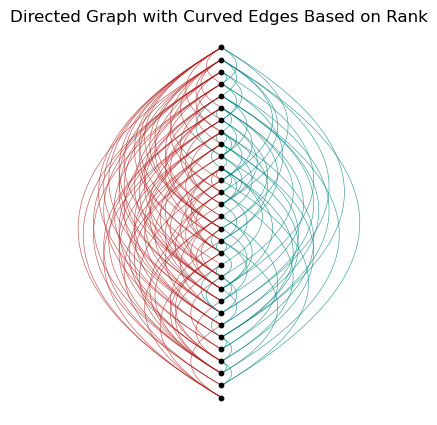

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path

# Generate a random directed graph for this example
G = nx.gnp_random_graph(30, 0.2, directed=True)

# Calculate rank based on degree (or another ranking metric)
rank = {node: degree for node, degree in G.in_degree()}

# Sort nodes by rank and assign them a y-position
sorted_nodes = sorted(rank.keys(), key=lambda x: rank[x])
y_positions = {node: i for i, node in enumerate(sorted_nodes)}

# Assign x-positions for nodes to center them
x_positions = {node: 0 for node in sorted_nodes}

# Function to draw curved edges
def draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature):
    control_x = (x_start + x_end) / 2 + curvature
    control_y = (y_start + y_end) / 2
    path_data = [
        (1, (x_start, y_start)),  # Move to
        (3, (control_x, control_y)),  # Curve to
        (3, (x_end, y_end)),  # Curve to
    ]
    path = Path([point for code, point in path_data], [code for code, point in path_data])
    patch = FancyArrowPatch(
        path=path,
        color=color,
        lw=0.5,
        alpha=0.7,
        arrowstyle="-",
    )
    ax.add_patch(patch)

# Create plot
fig, ax = plt.subplots(figsize=(4, 5))

# Draw edges with curves and different colors
for u, v in G.edges:
    x_start, y_start = x_positions[u], y_positions[u]
    x_end, y_end = x_positions[v], y_positions[v]
    if rank[u] < rank[v]:  # Edge goes up the hierarchy
        color = "firebrick"
    else:  # Edge goes down the hierarchy
        color = "teal"
    # Curvature based on the vertical distance between nodes
    curvature = 0.01 * (y_start - y_end)
    draw_curved_edge(ax, x_start, y_start, x_end, y_end, color, curvature)

# Draw nodes
nx.draw_networkx_nodes(
    G,
    pos={node: (x_positions[node], y_positions[node]) for node in G.nodes()},
    node_size=10,
    node_color="black",
    ax=ax,
)

# Remove axes for cleaner visualization
ax.axis("off")
plt.title("Directed Graph with Curved Edges Based on Rank")
plt.show()


In [59]:
tdf_all.to_csv('../data/edgelists/tdf_all_specialties_cleaned.csv', index=False)

In [ ]:
import pandas as pd
tdf_all = pd.read_csv('../data/tdf_all_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/edgelists/tdf_all_cleaned_2.csv'

In [4]:

import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in tdf_all.iterrows():
    G.add_edge(row['node_u'], row['node_v'], timestamp=row['timestamp'], doctor_id=row['doctor_id'], specialty=row['specialty'], weight=row['weight'])

# Print the number of nodes and edges
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 5017
Number of edges: 101180


In [6]:
import nethelp as nh
x, y = nh.distributions.degree_distribution(G)

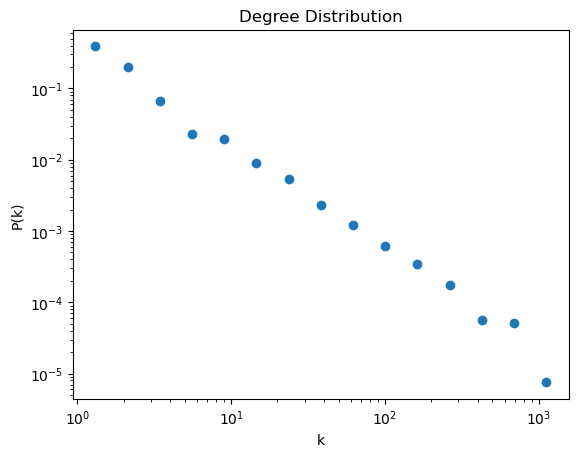

In [9]:
import matplotlib.pyplot as plt

plt.loglog(x, y, marker='o', linestyle='None')
plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Degree Distribution')
plt.show()